<a target="_blank" href="https://colab.research.google.com/github/jmanuelc87/nmp-autoavanza/blob/main/notebooks/image_analysis_01.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Image Analysis

Perform a text extraction without performing a document image cleaning like removing background or paper water marks.

### Converting PDFs to PNGs

In [1]:
import fitz

In [2]:
pdf_path = './data/bronze/TK_62853-1.pdf'

In [3]:
mat = fitz.Matrix(2.5, 2.5)
doc = fitz.open(pdf_path)
for page in doc:
    pix = page.get_pixmap(matrix=mat)
    pix.save(f'./data/bronze/TK_62853-1.png')

### Extracting text using OCR

In [4]:
import cv2
import numpy as np
import pytesseract as t
import matplotlib.pyplot as plt

from PIL import Image

In [5]:
scan_image = Image.open('./data/bronze/TK_62853-1.png')
image = np.array(scan_image)

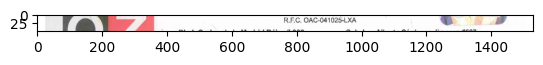

In [6]:
plt.imshow(image[100:150,:])

In [7]:
boxes = t.image_to_data(image, output_type=t.Output.DICT)

In [8]:
boxes.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [9]:
crop = []

for i in range(len(boxes['text'])):
    x, y = boxes['left'][i], boxes['top'][i]
    w, h = boxes['width'][i], boxes['height'][i]
    cropped = image[y:y+h,x:x+w].copy()
    crop.append((cropped, boxes['text'][i]))

len(crop)

673

Show all the extracted boxes

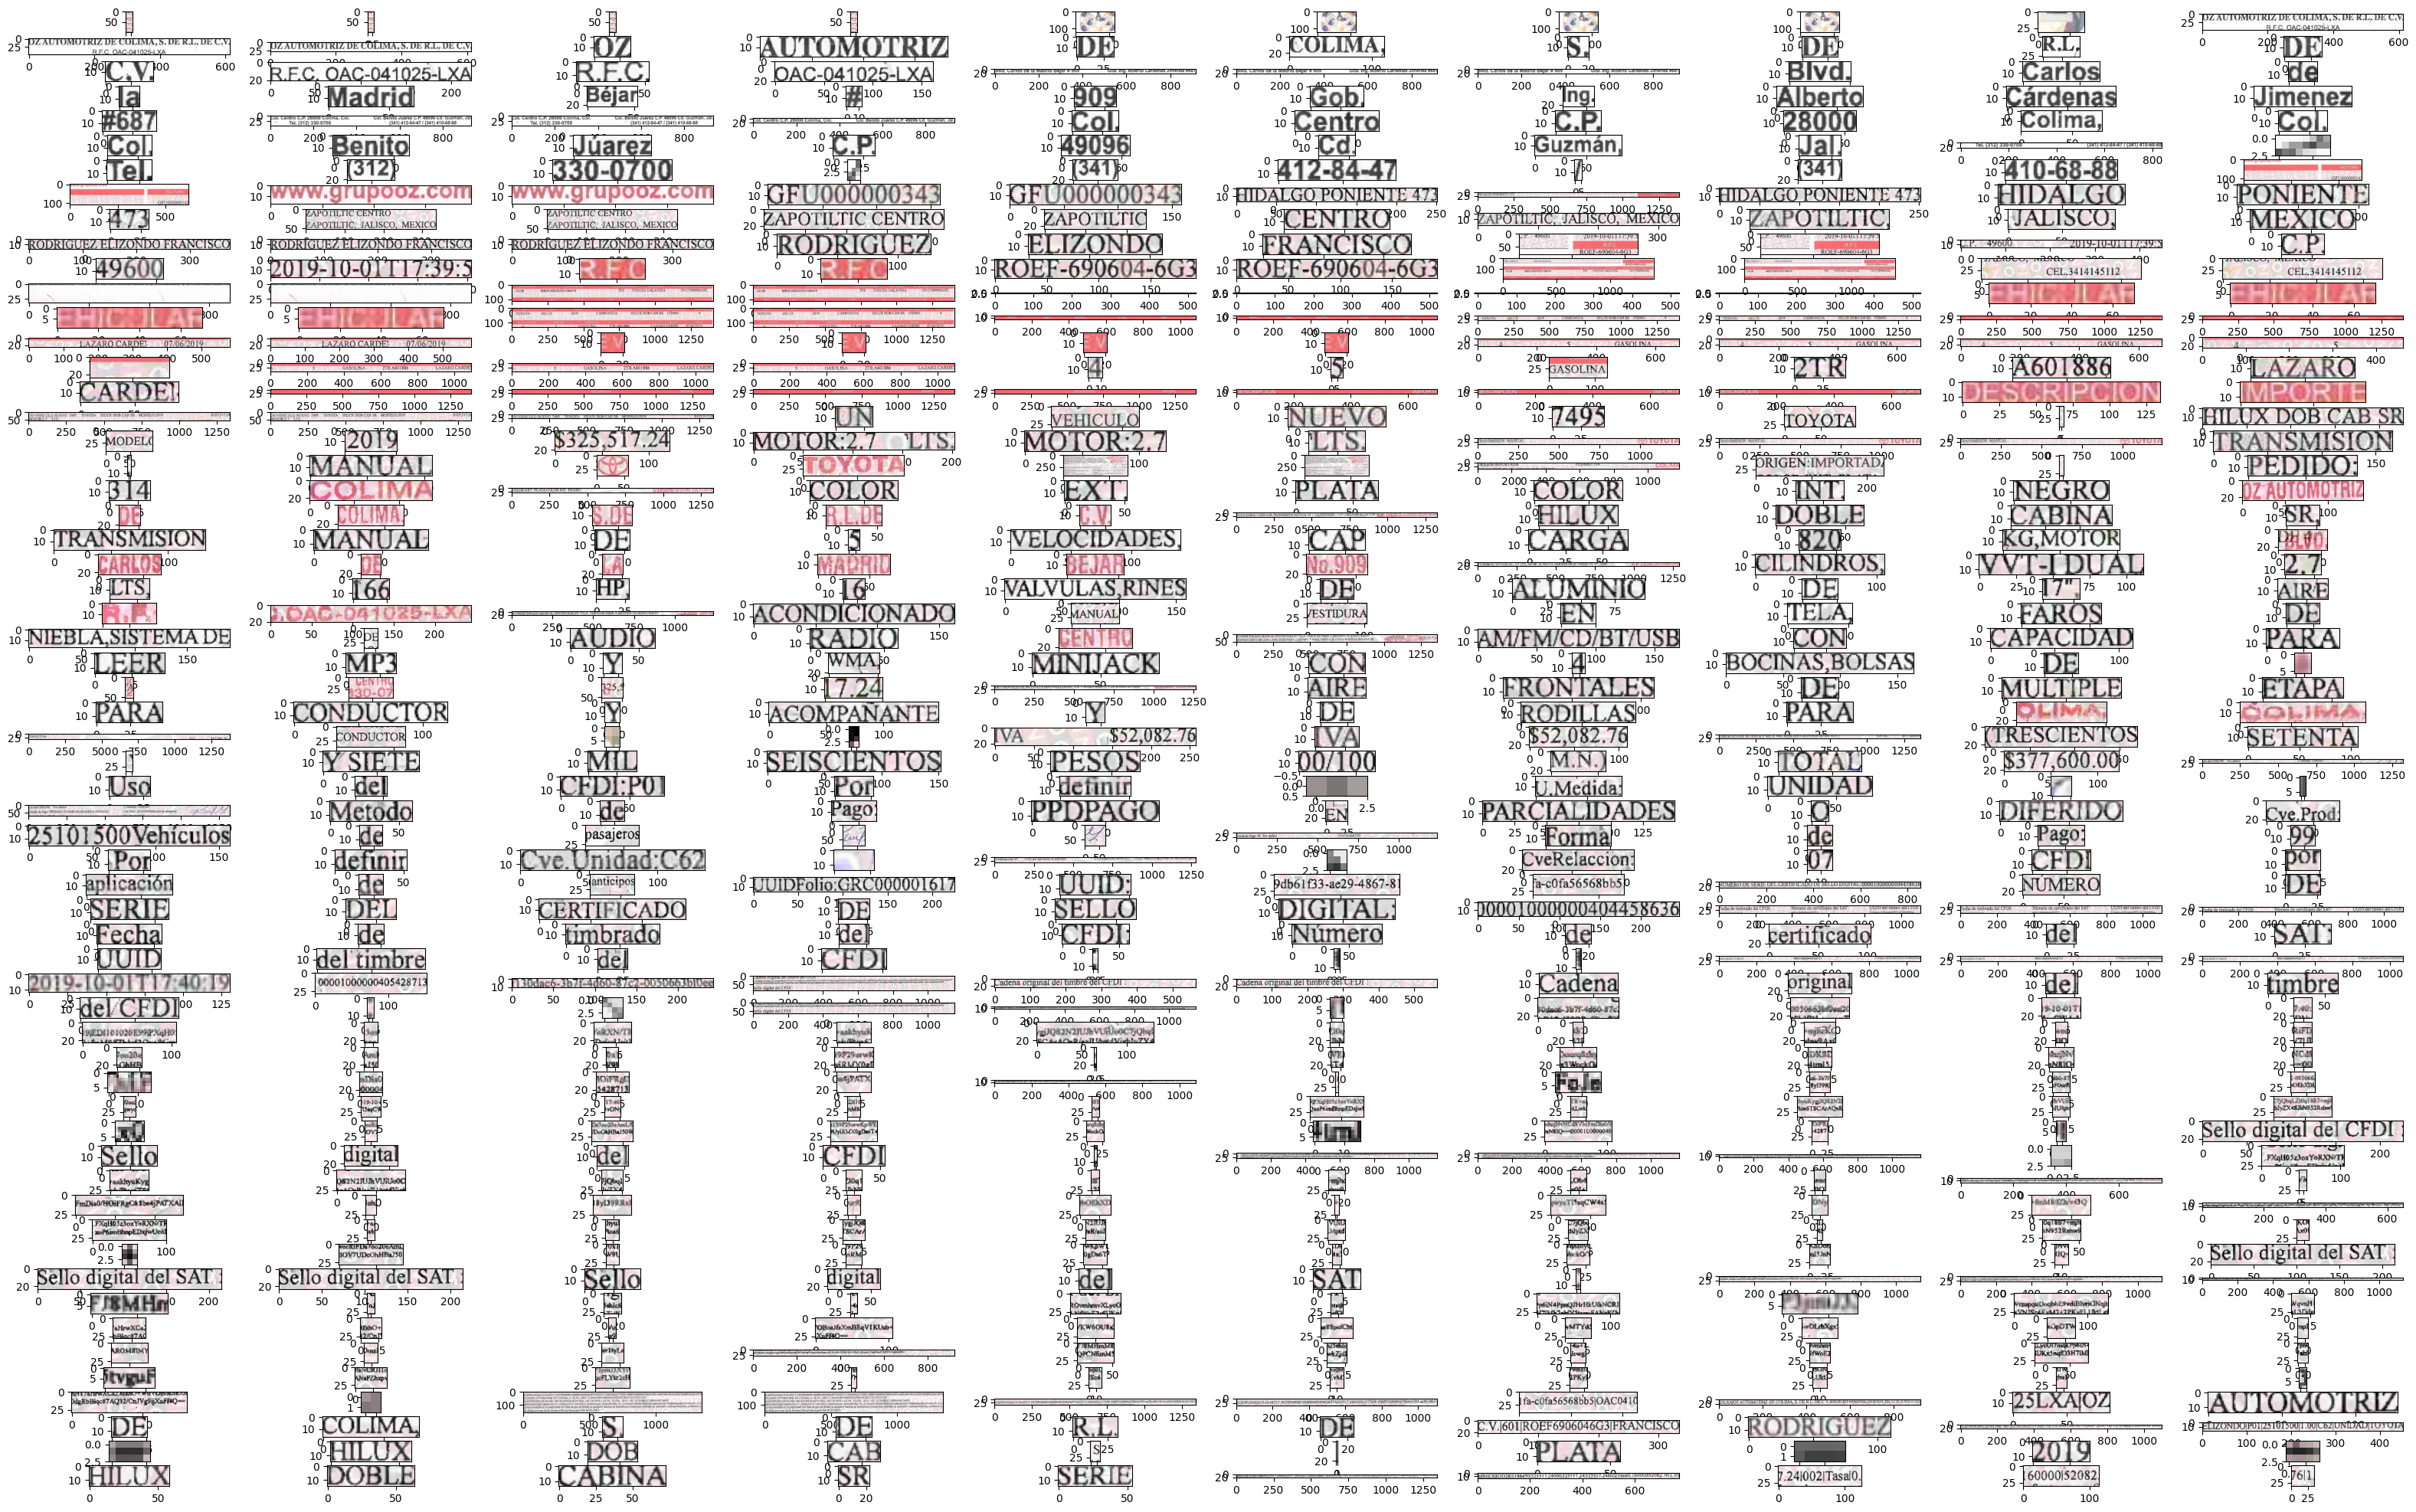

In [10]:
fig, axs = plt.subplots(60, 10, figsize=(40, 25))
axs = axs.flatten()
for i in range(0, 600):
    axs[i].imshow(crop[i+1][0])

## Extract text from crops using a Transformer

In [11]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [12]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten", use_fast=True)
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [13]:
for i in range(len(boxes['text'])):
    pixel_values = processor(crop[i][0], return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
    print('TrOCR: ', generated_text[0], end='\t')
    print('tesseract: ', crop[i][1])

TrOCR:  0 0	tesseract:  
TrOCR:  25	tesseract:  
TrOCR:  25	tesseract:  
TrOCR:  25	tesseract:  
TrOCR:  25	tesseract:  0343
TrOCR:  42	tesseract:  
TrOCR:  42	tesseract:  
TrOCR:  42	tesseract:  
TrOCR:  42	tesseract:     
TrOCR:  off	tesseract:   
TrOCR:  ON AUTOMOTRIZ DE CONMAS. DE R.L. DE C.V.	tesseract:  
TrOCR:  ON AUTOMOTRIZ DE CONMAS. DE R.L. DE C.V.	tesseract:  
TrOCR:  OZ AUTOMOTRIZ DE COLIMA , S. DE R.L. DE	tesseract:  
TrOCR:  oz	tesseract:  OZ
TrOCR:  automotriz	tesseract:  AUTOMOTRIZ
TrOCR:  ide	tesseract:  DE
TrOCR:  continuing	tesseract:  COLIMA,
TrOCR:  s.	tesseract:  S.
TrOCR:  de	tesseract:  DE
TrOCR:  roiso	tesseract:  RL,
TrOCR:  de	tesseract:  DE
TrOCR:  cify .	tesseract:  C.V.
TrOCR:  R.F.C. OAC-041025-LXA.	tesseract:  
TrOCR:  r.F.C.	tesseract:  R.F.C.
TrOCR:  oac-0141025-lxa	tesseract:  OAC-041025-LXA
TrOCR:  Blvd. Carlos de la Madrid Bejartt 909.0006, Bob. Ing	tesseract:  
TrOCR:  Blvd. Carlos de la Madrid Bejartt 909.0006, Bob. Ing	tesseract:  
TrOCR:  Blvd. 

The channel dimension is ambiguous. Got image shape torch.Size([3, 8, 3]). Assuming channels are the first dimension.


TrOCR:  " Tell . ( 3/2 ) 3.0-OTO. " 3.0005 .	tesseract:  
TrOCR:  0 0	tesseract:  -
TrOCR:  tel .	tesseract:  Tel.
TrOCR:  (3129	tesseract:  (312)
TrOCR:  330-000	tesseract:  330-0700
TrOCR:  0	tesseract:  ’
TrOCR:  (3419	tesseract:  (341)
TrOCR:  412-2844.	tesseract:  412-84-47
TrOCR:  l	tesseract:  /
TrOCR:  349.	tesseract:  (341)
TrOCR:  4/016-	tesseract:  410-68-88
TrOCR:  Download as PDFPrintable version	tesseract:  
TrOCR:  Download as PDFPrintable version	tesseract:  
TrOCR:  www. grupooz com	tesseract:  
TrOCR:  www. grupooz com	tesseract:  www.grupooz.com
TrOCR:  GFU000000343	tesseract:  
TrOCR:  GFU000000343	tesseract:  GFU000000343
TrOCR:  Hidalgo Ponente 473	tesseract:  
TrOCR:  Hidalgo Ponenteats 1928 1932 1932 1933 1954 1958 1959	tesseract:  
TrOCR:  Hidalgo Ponente 473	tesseract:  
TrOCR:  hidalgo	tesseract:  {DALGO
TrOCR:  poniente	tesseract:  PONIENTE
TrOCR:  473	tesseract:  473
TrOCR:  Zapolitan Tobacco Mexico	tesseract:  
TrOCR:  Zapolitan Tobacco Mexico	tesseract:  

The channel dimension is ambiguous. Got image shape torch.Size([3, 521, 3]). Assuming channels are the first dimension.


TrOCR:  2nd generation vessel with the two main distance to the	tesseract:       


The channel dimension is ambiguous. Got image shape torch.Size([3, 521, 3]). Assuming channels are the first dimension.


TrOCR:  0 0	tesseract:  


The channel dimension is ambiguous. Got image shape torch.Size([3, 521, 3]). Assuming channels are the first dimension.


TrOCR:  0 0	tesseract:  


The channel dimension is ambiguous. Got image shape torch.Size([3, 521, 3]). Assuming channels are the first dimension.


TrOCR:  0 0	tesseract:  
TrOCR:  0 0	tesseract:   
TrOCR:  to the	tesseract:  
TrOCR:  to the	tesseract:  
TrOCR:  to the	tesseract:  
TrOCR:  to the	tesseract:  EHICULAR
TrOCR:  0 0	tesseract:  
TrOCR:  0 0	tesseract:  
TrOCR:  a total of the total of total income was the median income of the median income	tesseract:  
TrOCR:  a total of the total of total income was the median income of the median income	tesseract:   
TrOCR:  tomota , HILUX , 2019 # Cannoneta- Hiluxdob Sir Isz	tesseract:  
TrOCR:  tomota , HILUX , 2019 # Cannoneta- Hiluxdob Sir Isz	tesseract:   
TrOCR:  There were two more members who had been the first ever	tesseract:  
TrOCR:  There were two more members who had been the first ever	tesseract:    
TrOCR:  # LaZaro Carde . " 0710612019	tesseract:  
TrOCR:  # LaZaro Carde . " 0710612019	tesseract:    
TrOCR:  0	tesseract:  
TrOCR:  0	tesseract:  
TrOCR:  0	tesseract:  
TrOCR:  0	tesseract:   
TrOCR:  # what it is not being the most important appearance that it was	tes

The channel dimension is ambiguous. Got image shape torch.Size([1, 3, 3]). Assuming channels are the first dimension.


TrOCR:  defimir	tesseract:  definir
TrOCR:  0 0	tesseract:  :
TrOCR:  un-middidata .	tesseract:  U.Medida;
TrOCR:  unidad	tesseract:  UNIDAD
TrOCR:  0	tesseract:  r
TrOCR:  0 1	tesseract:  -
TrOCR:  # a good success on Mexico because he resigned the Sheriff of	tesseract:  
TrOCR:  metodo	tesseract:  Metédo
TrOCR:  de	tesseract:  de
TrOCR:  pagoi	tesseract:  Pago:
TrOCR:  prodpago	tesseract:  PPDPAGO
TrOCR:  e'n	tesseract:  EN
TrOCR:  parcialidades	tesseract:  PARCIALIDADES
TrOCR:  0	tesseract:  O
TrOCR:  differtido	tesseract:  DIFERIDO.
TrOCR:  cveloprodi	tesseract:  Cve-Prod:
TrOCR:  25101500Vehiculus	tesseract:  25101500Vehiculos
TrOCR:  de	tesseract:  de
TrOCR:  parajeros	tesseract:  pasajeros
TrOCR:  truff .	tesseract:  hap
TrOCR:  ily	tesseract:  AL
TrOCR:  Formble Page . St. Portifico. 5. 5. 5. 5. 5.	tesseract:  
TrOCR:  formia	tesseract:  Forma
TrOCR:  de	tesseract:  de
TrOCR:  pagoi	tesseract:  Pago:
TrOCR:  99	tesseract:  99
TrOCR:  por	tesseract:  Por
TrOCR:  defimir	tesserac

The channel dimension is ambiguous. Got image shape torch.Size([3, 3, 3]). Assuming channels are the first dimension.


TrOCR:  Overelection of COVID 19 opposition to anticipatory to the UNDPosition GRIN00001617	tesseract:  
TrOCR:  0 0	tesseract:  ~
TrOCR:  everelaccioni	tesseract:  CveRelaccion:
TrOCR:  0'7	tesseract:  07
TrOCR:  cfidi	tesseract:  CFDI
TrOCR:  por	tesseract:  por
TrOCR:  application	tesseract:  aplicacién
TrOCR:  dp.	tesseract:  de
TrOCR:  anticipos	tesseract:  anticipos
TrOCR:  WUIDFOLIO. GER C000001617	tesseract:  UUIDFolio;GRC000001617
TrOCR:  liquid :	tesseract:   UUID:
TrOCR:  9db61f33-ac29-4867281	tesseract:  9db61£33-ae29-4867-81
TrOCR:  fa-c0fa56568bbis .	tesseract:  fa-c0fa56568bb5,
TrOCR:  Numerous Serie del Certificado de Sello Digitali0000100000040445863	tesseract:  
TrOCR:  numero	tesseract:  NUMERO
TrOCR:  de	tesseract:  DE
TrOCR:  serife .	tesseract:  SERIE
TrOCR:  del	tesseract:  DEL
TrOCR:  certificado	tesseract:  CERTIFICADO
TrOCR:  de	tesseract:  DE
TrOCR:  sello	tesseract:  SELLO
TrOCR:  digital :	tesseract:  DIGITAL:
TrOCR:  00001000000404458636	tesseract:  000010

The channel dimension is ambiguous. Got image shape torch.Size([3, 3, 3]). Assuming channels are the first dimension.


TrOCR:  Categories French businesspeopleBusinesspeople from London MassachusettsAmerican businesspeople from Pennsylvania Pennsylvania MassachusettsAmerican businesspeople	tesseract:  
TrOCR:  0 1	tesseract:  By
TrOCR:  psychosomaintain	tesseract:  _FigltoschoxYoRXN/TR
TrOCR:  rankigsummer	tesseract:  +anknyukye
TrOCR:  assensum-	tesseract:  JOS2N2TURVUTCOC
TrOCR:  riqual	tesseract:  T}Qbqh
TrOCR:  zoogi	tesseract:  20g!
TrOCR:  s	tesseract:  857
TrOCR:  imighty	tesseract:  thc
TrOCR:  joba	tesseract:  KOb4
TrOCR:  piece .	tesseract:  woe
TrOCR:  REPONDED MANUALITY DEVERNATIONAL REConnaissance Society of America CANUALITY COMM	tesseract:  RIFDx7oc20eAmL/04139P25erwkpWEDosrgichuIDKSDohs)NVNCHE
TrOCR:  van	tesseract:  YM
TrOCR:  Fundination in French significance and	tesseract:  FnDiaO/HOIERECAED+AJPATXALF
TrOCR:  ichi	tesseract:  ch
TrOCR:  sequisition	tesseract:  18y39RULAF
TrOCR:  irii	tesseract:  eR
TrOCR:  morenixon	tesseract:  OVOHEANDI
TrOCR:  0	tesseract:  +
TrOCR:  millionistsma

The channel dimension is ambiguous. Got image shape torch.Size([3, 6, 3]). Assuming channels are the first dimension.


TrOCR:  elizondo PO 1/2S.O.500.1.00062 , unidad	tesseract:  ELIZONDO|PO01[25101500|1.00|C62|UNIDAD|TOYOTA
TrOCR:  0 0	tesseract:  -
TrOCR:  hilly	tesseract:  HILUX
TrOCR:  dob	tesseract:  DOB
TrOCR:  cab .	tesseract:  CAB
TrOCR:  s	tesseract:  SR
TrOCR:  0 1	tesseract:  -
TrOCR:  plata	tesseract:  PLATA
TrOCR:  0 0	tesseract:  -


The channel dimension is ambiguous. Got image shape torch.Size([3, 5, 3]). Assuming channels are the first dimension.


TrOCR:  2019	tesseract:  2019
TrOCR:  0 0	tesseract:  -
TrOCR:  hillbox	tesseract:  HILUX
TrOCR:  dobile .	tesseract:  DOBLE
TrOCR:  cabinia	tesseract:  CABINA
TrOCR:  sr	tesseract:  SR
TrOCR:  serie .	tesseract:  SERIE
TrOCR:  MRNZODDDICION864SU3251 7 24001325 1 7243253	tesseract:  
TrOCR:  MRQEXBD2K0I864501325157 24000325517.413	tesseract:  MROEX8DD2K01864501325517.24000/325517.24132551
TrOCR:  7.241002itasalo .	tesseract:  7.241002|Tasal0.
TrOCR:  16,000is282	tesseract:  160000152082.
TrOCR:  7611.	tesseract:  7611.
TrOCR:  111520001	tesseract:  111520601!
TrOCR:  iroexeddzkoi	tesseract:  MROEX8DD2K01
TrOCR:  86450119513 788900269212019_06_071_AZA	tesseract:  86450/195137889002692|2019-06-07ILAZA
TrOCR:  Latursimisitive la propiedad del Diemal que se retire la presente tac	tesseract:  
TrOCR:  la	tesseract:  La
TrOCR:  transmission	tesseract:  transmisién
TrOCR:  de	tesseract:  de
TrOCR:  la	tesseract:  la
TrOCR:  propiedad	tesseract:  propiedad
TrOCR:  del	tesseract:  del
TrOCR:  b